In [55]:
import pandas as pd

Exploration

In [95]:
df = pd.read_csv('Clean_Dataset.csv')

In [96]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [64]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [8]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [6]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [21]:
df.stops.value_counts()

stops
1    250863
0     36004
2     13286
Name: count, dtype: int64

In [74]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

## Preprocessing

In [97]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('flight', axis=1)

df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)


In [98]:
df.stops = pd.factorize(df.stops)[0]

In [99]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [100]:
df = df.join(pd.get_dummies(df.airline, prefix='airline')).drop('airline', axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix='source')).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix='dest')).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival')).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure')).drop('departure_time', axis=1)

In [101]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
300149,1,1,10.42,49,77105,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
300150,1,1,13.83,49,79099,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
300151,1,1,10.00,49,81585,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


## Training Regression Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

'''
### x, y = df.drop('price', axis=1), df.price

    x = df.drop('price', axis=1) - This creates a new DataFrame x that contains all columns from df except the 'price' column.

        drop('price', axis=1) means "remove the column named 'price'"

        axis=1 specifies that we're dropping a column (as opposed to axis=0 which would drop a row)

    y = df.price - This creates a Series y that contains only the 'price' column from df.

        df.price is equivalent to df['price']

This is a common pattern in machine learning where:

    x represents the features (independent variables) - everything except what we're trying to predict

    y represents the target (dependent variable) - what we're trying to predict (in this case, price)

So essentially, this code is preparing the data for a supervised learning task where you would use all columns except 
'price' to predict the 'price' column.
'''
x, y = df.drop('price', axis=1), df.price

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [ ]:
reg = RandomForestRegressor(n_jobs=-1) # n_jobs=-1 means use all available CPU cores for parallel processig.This speeds up training by distributing the workload across multiple cores.
reg.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [110]:
reg.score(x_test, y_test)

0.9855746323410407

In [112]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(x_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))


R2: 0.9855746323410407
MAE: 1060.9688876167947
MSE: 7408261.122939391
RMSE: 2721.812102798316


Text(0.5, 1.0, 'Prediction VS Actual Price')

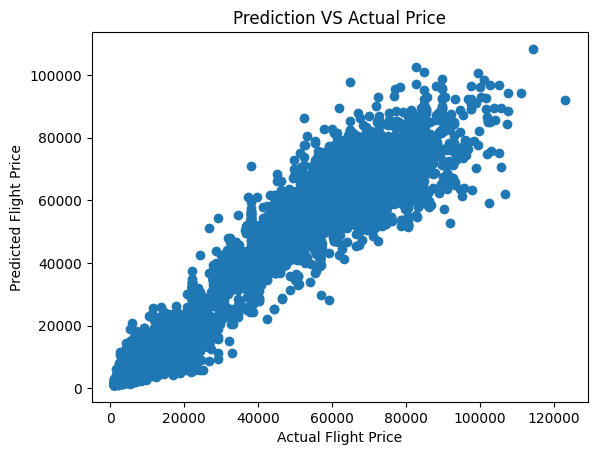

In [ ]:
''''
This Python code evaluates the performance of a regression model by calculating four common metrics: R² score, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). Here’s a breakdown:

1. y_pred = reg.predict(x_test)
    This line makes predictions (y_pred) using a trained regression model (reg) on the test dataset (x_test).'

2. mean_squared_error(y_test, y_pred)
    MSE (Mean Squared Error): Computes the average squared difference between actual and predicted values.
    Penalizes larger errors more than MAE because errors are squared.

This evaluation helps assess whether the regression model is performing well and which errors it makes in predictions.

'''

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction VS Actual Price')

In [116]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [120]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

sorted_importances

[('class', np.float64(0.8798307498058366)),
 ('duration', np.float64(0.05767923420340516)),
 ('days_left', np.float64(0.018542946534047144)),
 ('airline_Air_India', np.float64(0.005337011993259121)),
 ('airline_Vistara', np.float64(0.004503394724791744)),
 ('source_Delhi', np.float64(0.0036957962957592854)),
 ('dest_Delhi', np.float64(0.0033919866105786276)),
 ('source_Mumbai', np.float64(0.0022407088424592795)),
 ('dest_Mumbai', np.float64(0.001936231104649514)),
 ('stops', np.float64(0.0018302788272509722)),
 ('dest_Kolkata', np.float64(0.001782050425693827)),
 ('source_Kolkata', np.float64(0.00170891899528876)),
 ('arrival_Evening', np.float64(0.001543932929818306)),
 ('dest_Hyderabad', np.float64(0.0015164402769173488)),
 ('source_Hyderabad', np.float64(0.0012892033754922758)),
 ('dest_Bangalore', np.float64(0.0012867364116285038)),
 ('arrival_Night', np.float64(0.0011297501950086033)),
 ('source_Bangalore', np.float64(0.0010909335149008198)),
 ('departure_Evening', np.float64(0.00

<BarContainer object of 5 artists>

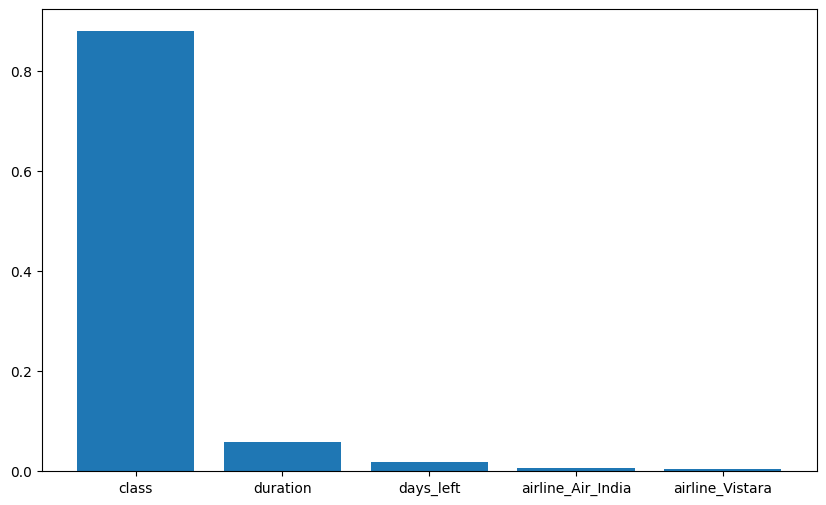

In [123]:
plt.figure(figsize=(10, 6))
plt.bar([x[0] for x in sorted_importances[:5]], [x[1] for x in sorted_importances[:5]])

In [ ]:
# from sklearn.model_selection import GridSearchCV

# reg = RandomForestRegressor(n_jobs=-1)

# param_grid = {

#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt']
# }

# grid_search = GridSearchCV(reg, param_grid, cv=5)
# grid_search.fit(x_train, y_train)

# best_params = grid_search.best_params_

In [130]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', 0.33, 0.5, 0.7]
}

reg = RandomForestRegressor(n_jobs=-1)
random_search = RandomizedSearchCV(
    estimator=reg, 
    param_distributions=param_dist, 
    n_iter=10, 
    cv=3,
    scoring= 'neg_mean_squared_error',
    verbose=2, 
    random_state=10, 
    n_jobs=-1,
    error_score='raise'
    )

random_search.fit(x_train, y_train)
best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


KeyboardInterrupt: 

In [127]:
best_regressor.score(x_test, y_test)

0.9863979575441618

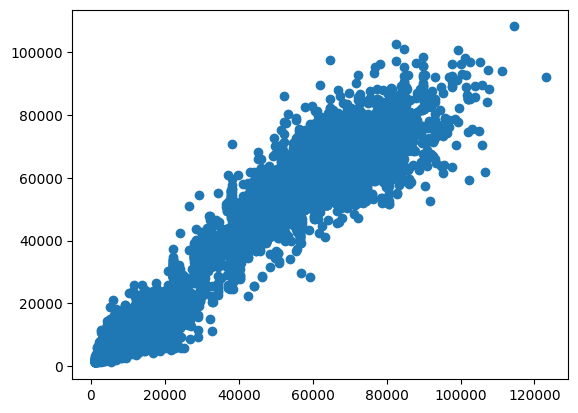

In [128]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)